In [1]:
import os, requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMAGE_SIZE = (256, 256)
VALIDATION_SPLIT = 0.25
BATCH_SIZE = 128

In [6]:
gdrive_dir = "/content/drive/MyDrive"
working_dir = os.path.join(gdrive_dir, "NUS/CS3244/CS3244 Project")
data_dir = os.path.join(working_dir, "landmarks/local")
model_root_dir = os.path.join(working_dir, "models/Pinxi")

In [7]:
print('number of local labels:', len(os.listdir(data_dir)))

number of local labels: 11


In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, 
    validation_split = VALIDATION_SPLIT,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    fill_mode = 'nearest'
)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset = "training", 
    shuffle = True, 
    target_size = IMAGE_SIZE ,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = VALIDATION_SPLIT
)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    subset = "validation", 
    shuffle = False, 
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 3423 images belonging to 11 classes.
Found 1136 images belonging to 11 classes.


In [ ]:
load_model_dir = os.path.join(model_root_dir, "inceptionv3_model_iA21t0b20")
international_model = tf.keras.models.load_model(load_model_dir)

In [ ]:
international_model.summary()

In [ ]:
last_layer = international_model.get_layer("dropout")
last_output = last_layer.output

In [ ]:
x = layers.Dense(11, activation='softmax', name='output')(last_output)

model = Model(international_model.input, x)

In [ ]:
save_model_dir = os.path.join(model_root_dir, "inceptionv3_model_lA_iA21t0b20")
model.save(save_model_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/NUS/CS3244/CS3244 Project/models/Pinxi/inceptionv3_model_lA_iA21t0b20/assets


In [26]:
load_model_dir = os.path.join(model_root_dir, "inceptionv3_model_lA30_iA21t0b20")
model = tf.keras.models.load_model(load_model_dir)

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

steps_per_epoch = int(train_generator.samples / BATCH_SIZE)
validation_steps = int(validation_generator.samples / BATCH_SIZE)

print("Steps per epoch:", steps_per_epoch)
print("Validation steps:", validation_steps)

Steps per epoch: 26
Validation steps: 8


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = validation_steps
)

save_model_dir = os.path.join(model_root_dir, "inceptionv3_model_lA80_iA21t0b20")
model.save(save_model_dir)

df = pd.DataFrame(history.history)
hist_dir = os.path.join(model_root_dir, "history/inceptionv3_model_lA80_iA21t0b20.csv")
df.to_csv(hist_dir)

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9684 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


26/26 [==============================] - 1373s 51s/step - loss: 0.1068 - accuracy: 0.9681 - val_loss: 2.2177 - val_accuracy: 0.6025
Epoch 2/30
26/26 [==============================] - 103s 4s/step - loss: 0.0959 - accuracy: 0.9674 - val_loss: 2.7019 - val_accuracy: 0.5869
Epoch 3/30
26/26 [==============================] - 101s 4s/step - loss: 0.0949 - accuracy: 0.9726 - val_loss: 2.0944 - val_accuracy: 0.6406
Epoch 4/30
26/26 [==============================] - 100s 4s/step - loss: 0.0874 - accuracy: 0.9708 - val_loss: 2.2516 - val_accuracy: 0.6387
Epoch 5/30
26/26 [==============================] - 100s 4s/step - loss: 0.0809 - accuracy: 0.9713 - val_loss: 2.2505 - val_accuracy: 0.6230
Epoch 6/30
26/26 [==============================] - 100s 4s/step - loss: 0.0843 - accuracy: 0.9712 - val_loss: 2.6100 - val_accuracy: 0.5771
Epoch 7/30
26/26 [==============================] - 100s 4s/step - loss: 0.1032 - accuracy: 0.9645 - val_loss: 2.2162 - val_accuracy: 0.5947
Epoch 8/30
26/26 [====

Text(0.5, 1.0, 'Training and validation loss')

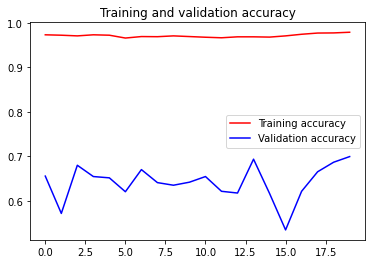

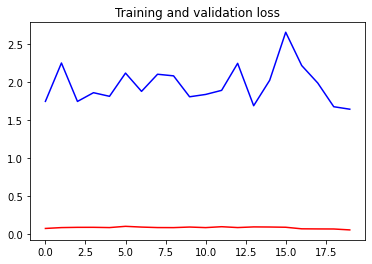

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [30]:
url = "https://www.japan-guide.com/g20/3201_01.jpg"
# url = "https://www.visitsingapore.com/see-do-singapore/recreation-leisure/viewpoints/merlion-park/_jcr_content/par-carousel/carousel_detailpage/carousel/item_2.thumbnail.carousel-img.740.416.jpg"
# url = "https://www.visitsingapore.com/see-do-singapore/nature-wildlife/parks-gardens/gardens-by-the-bay/_jcr_content/par/mobile_21_content_sl/sliderccpar1/content_img_insta/content/item_2.thumbnail.image-path.350.197.jpg"
# url = "https://www.businesstimes.com.sg/sites/default/files/styles/large_popup/public/image/2020/07/21/Singapore%20Flyer%20and%20skyline%20-%20ST%20file.jpg?itok=1y0m-Kxq"
# url = "https://www.8days.sg/image/12881400/16x9/1920/1080/e6b59ad3f6ed8bf079d379b31e9d819/nH/01-uss-reopening.jpg"
# url = "https://theindependent.sg/wp-content/uploads/2018/06/Singapore_Esplanade_-_Theatres_by_the_Bay_4.jpg"
# url = "https://i2.wp.com/www.nothingfamiliar.com/wp-content/uploads/2020/05/Gardens-By-the-Bay-Singapore-1.jpg?fit=1440%2C960&ssl=1"
# url = "https://www.visitsingapore.com/walking-tour/eat-drink/drinking-clarke-quay-boat-quay/_jcr_content/par-carousel/carousel_detailpage/carousel/item_1.thumbnail.carousel-img.740.416.jpg"

try:
  image_data = requests.get(url, stream=True).raw
except Exception as e:
  print('Warning: Could not download image from %s' % url)
  print('Error: %s' %e)
  raise

try:
  pil_image = Image.open(image_data)
except Exception as e:
  print('Warning: Failed to parse image')
  print('Error: %s' %e)
  raise

try:
  img = pil_image.convert('RGB').resize(IMAGE_SIZE)
except:
  print('Warning: Failed to format image')
  raise

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)
labels = list(train_generator.class_indices.keys())

output = []

for i in range(len(classes[0])):
  output.append((labels[i], classes[0][i]))

output.sort(key=lambda x:-x[1])

for i in range(len(output)):
  print("%s: %s" % (output[i][0], output[i][1]))

['bugis', 'chinatown', 'clarke quay', 'esplanade', 'flowerdome', 'flyer', 'hajilane', 'marinabaysands', 'merlion', 'supertree', 'uss']
esplanade: 0.731247
hajilane: 0.26845768
bugis: 0.0002428853
chinatown: 5.0025654e-05
flowerdome: 2.0261298e-06
clarke quay: 4.1185788e-07
marinabaysands: 4.1952344e-09
supertree: 2.0110962e-12
merlion: 3.6549556e-13
uss: 1.362323e-13
flyer: 6.490118e-15
